In [2]:
import os
import sys
sys.path.append('..')

In [3]:
from src import data_preprocessing
from src.data_preprocessing import *

# Step 1: Load datasets
fraud_df, ip_df, credit_df = load_datasets()

# Step 2: Explore datasets
explore_dataset(fraud_df, "Fraud Data")
explore_dataset(ip_df, "IP Address Data")
explore_dataset(credit_df, "Credit Card Data")

===== Fraud Data Overview =====
   user_id          signup_time        purchase_time  purchase_value  \
0    22058  2015-02-24 22:55:49  2015-04-18 02:47:11              34   
1   333320  2015-06-07 20:39:50  2015-06-08 01:38:54              16   
2     1359  2015-01-01 18:52:44  2015-01-01 18:52:45              15   
3   150084  2015-04-28 21:13:25  2015-05-04 13:54:50              44   
4   221365  2015-07-21 07:09:52  2015-09-09 18:40:53              39   

       device_id source browser sex  age    ip_address  class  
0  QVPSPJUOCKZAR    SEO  Chrome   M   39  7.327584e+08      0  
1  EOGFQPIZPYXFZ    Ads  Chrome   F   53  3.503114e+08      0  
2  YSSKYOSJHPPLJ    SEO   Opera   M   53  2.621474e+09      1  
3  ATGTXKYKUDUQN    SEO  Safari   M   41  3.840542e+09      0  
4  NAUITBZFJKHWW    Ads  Safari   M   45  4.155831e+08      0  

Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 151112 entries, 0 to 151111
Data columns (total 11 columns):
 #   Column          Non-Null Cou

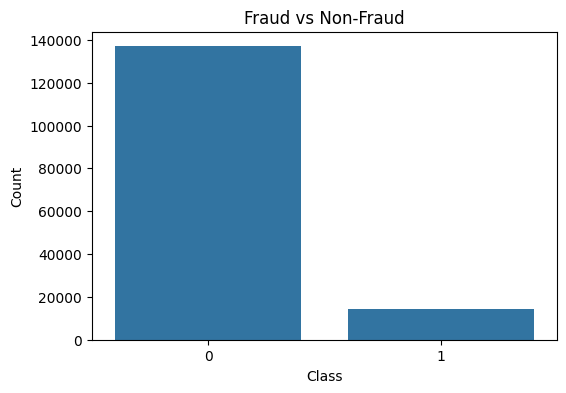

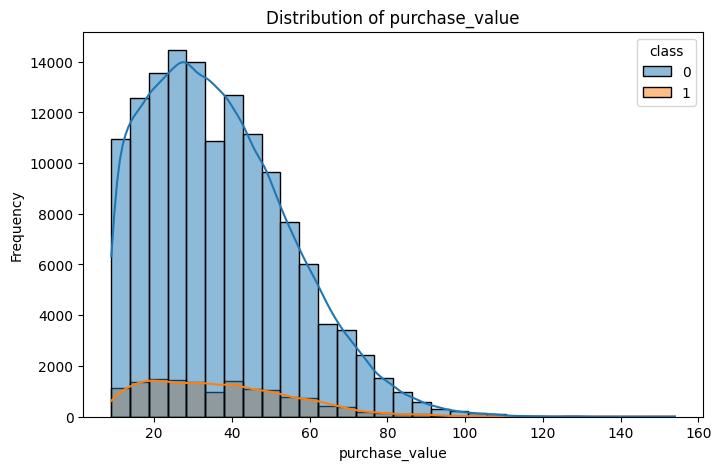

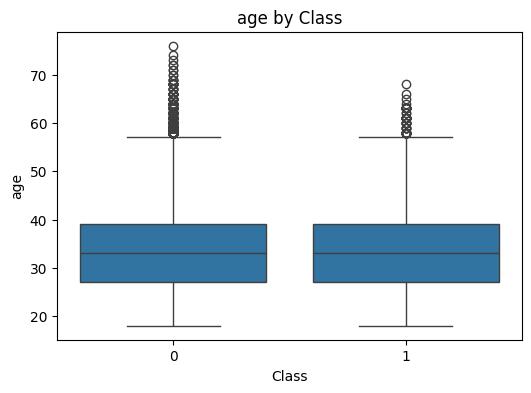

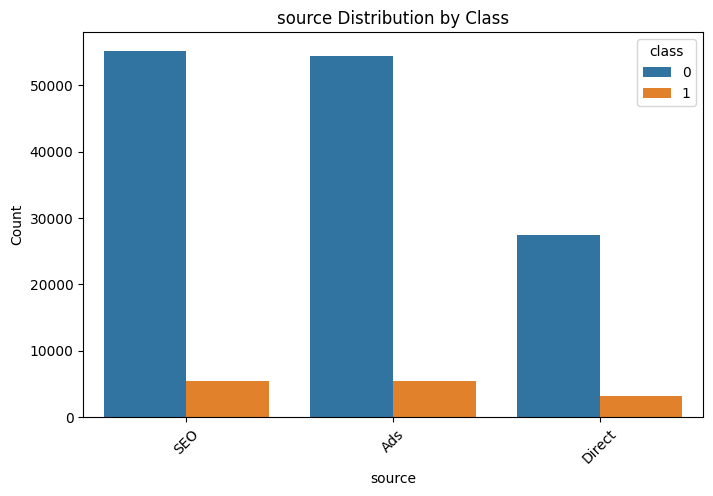

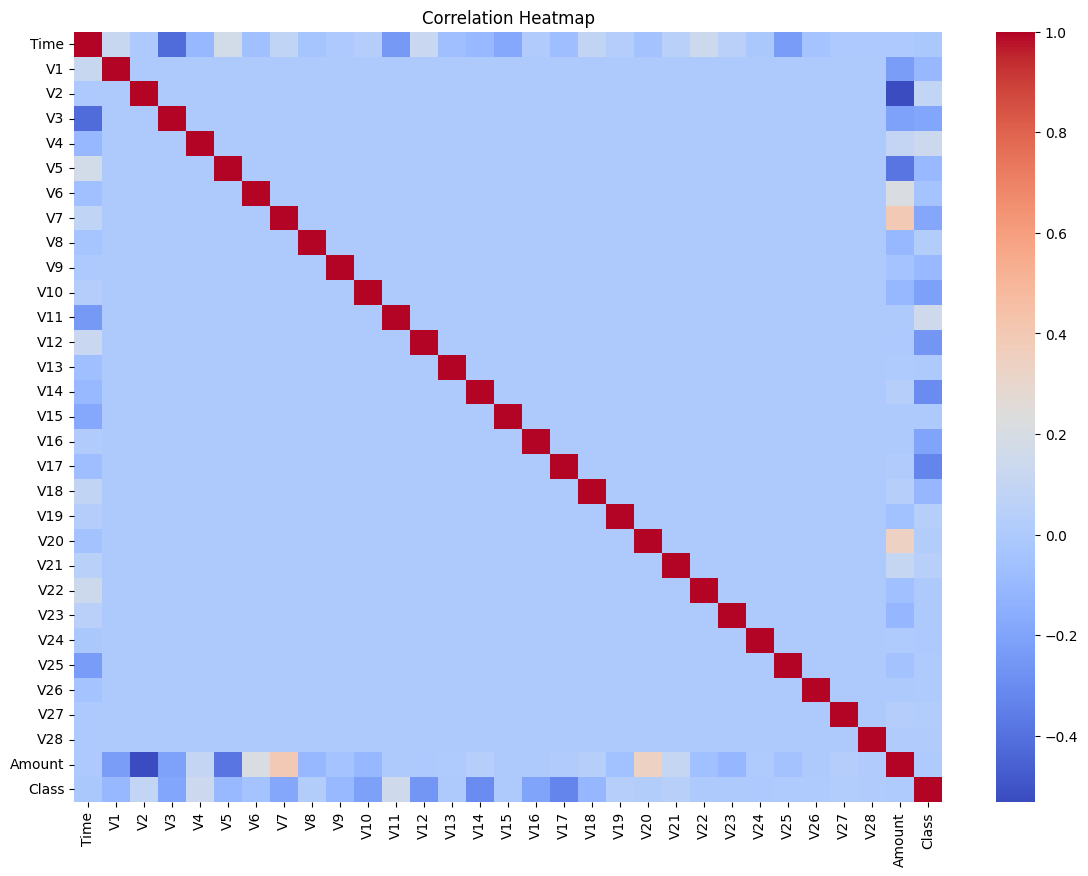

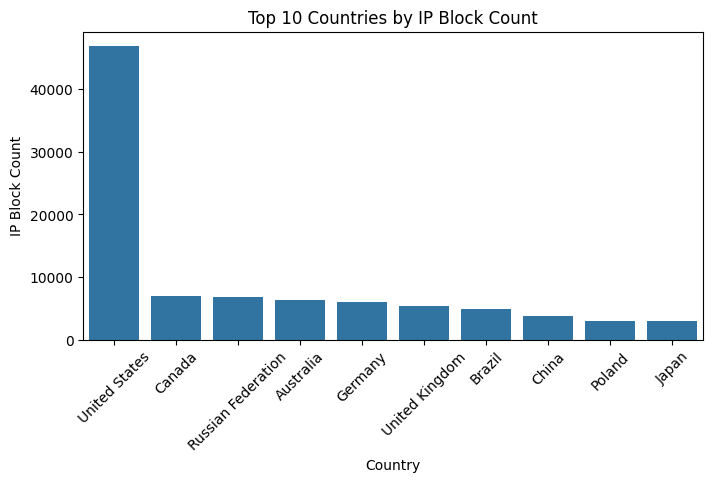

In [4]:
from src.visualization import (
    plot_class_distribution,
    plot_numeric_distribution,
    plot_boxplot_by_class,
    plot_categorical_by_class,
    plot_correlation_heatmap,
    plot_top_n_countries
)

# Example usage:
plot_class_distribution(fraud_df, class_col="class", title="Fraud vs Non-Fraud")
plot_numeric_distribution(fraud_df, column="purchase_value", hue="class")
plot_boxplot_by_class(fraud_df, column="age", class_col="class")
plot_categorical_by_class(fraud_df, column="source", class_col="class")
plot_correlation_heatmap(credit_df)
plot_top_n_countries(ip_df, n=10)


In [5]:
# Step 3: Clean datasets
fraud_df = clean_data(fraud_df)
credit_df = clean_data(credit_df)

# Step 4: Convert types
fraud_df = convert_datatypes(fraud_df)



c:\Users\tsega\OneDrive\Documents\-detection-of-fraud-cases-for-e-commerce\notebooks\..\src\data_preprocessing.py:38: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df = df.fillna(method='ffill')


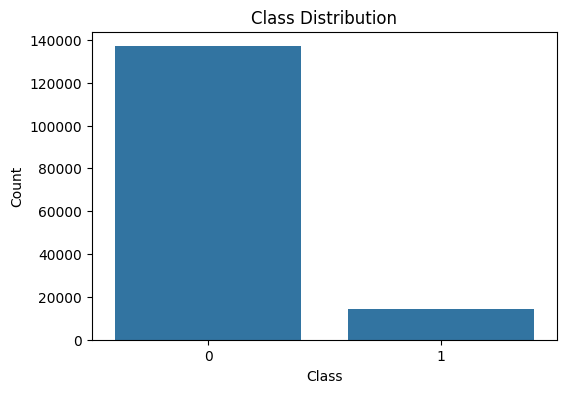

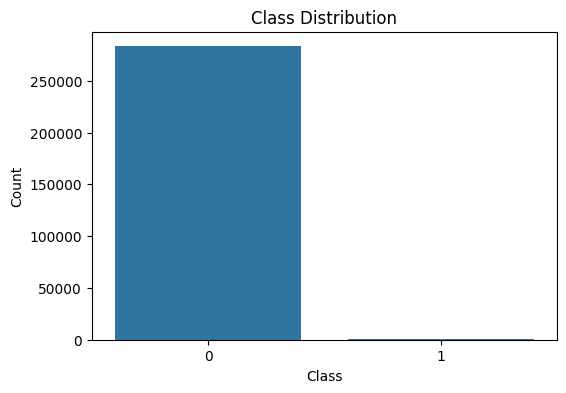

In [6]:
# Step 5: Plot class distribution
plot_class_distribution(fraud_df, class_col="class")         # for E-Commerce fraud data
plot_class_distribution(credit_df, class_col="Class")  

In [7]:
# Check for missing values and duplicates in each dataset
def quick_data_check(df, name):
    print(f"--- {name} ---")
    print("Shape:", df.shape)
    print("Missing values:\n", df.isnull().sum())
    print("Total missing:", df.isnull().sum().sum())
    print("Duplicate rows:", df.duplicated().sum())
    print("\n")

quick_data_check(fraud_df, "E-Commerce Transaction Data")
quick_data_check(ip_df, "IP to Country Mapping")
quick_data_check(credit_df, "Credit Card Transaction Data")


--- E-Commerce Transaction Data ---
Shape: (151112, 11)
Missing values:
 user_id           0
signup_time       0
purchase_time     0
purchase_value    0
device_id         0
source            0
browser           0
sex               0
age               0
ip_address        0
class             0
dtype: int64
Total missing: 0
Duplicate rows: 0


--- IP to Country Mapping ---
Shape: (138846, 3)
Missing values:
 lower_bound_ip_address    0
upper_bound_ip_address    0
country                   0
dtype: int64
Total missing: 0
Duplicate rows: 0


--- Credit Card Transaction Data ---
Shape: (283726, 31)
Missing values:
 Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int6

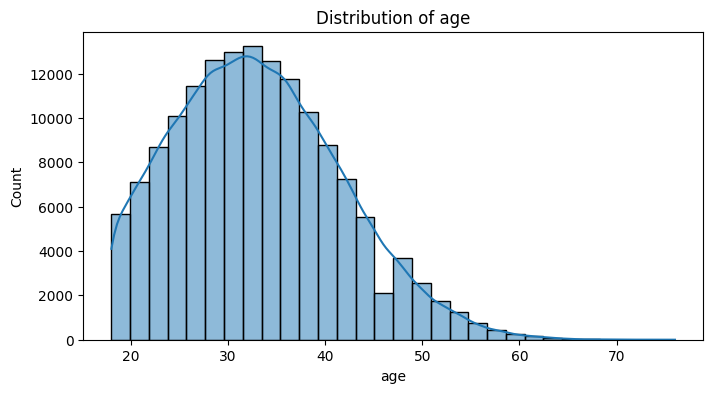

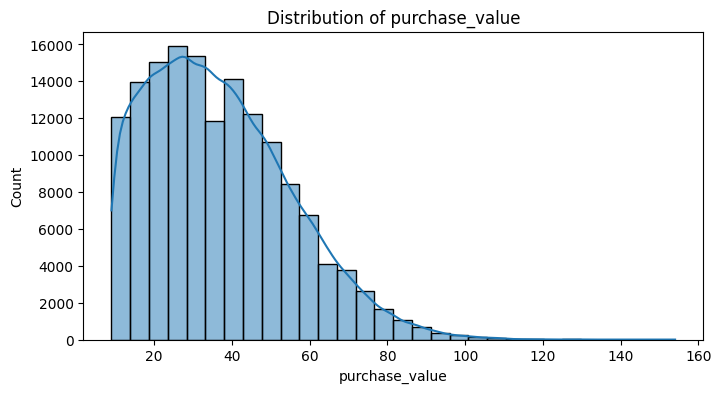

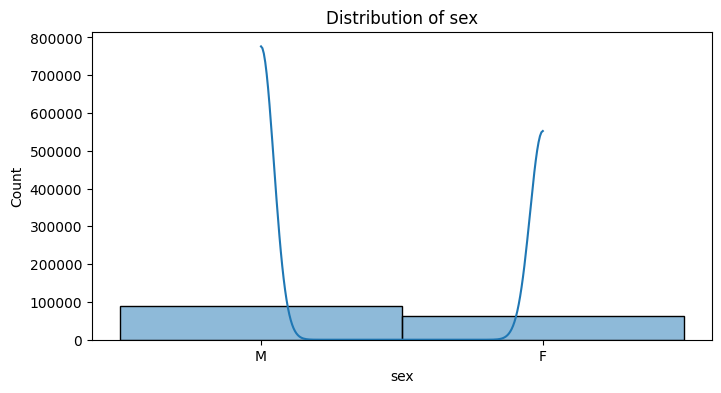

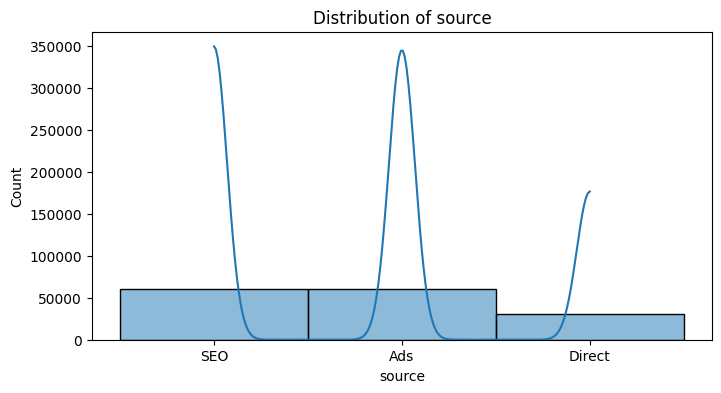

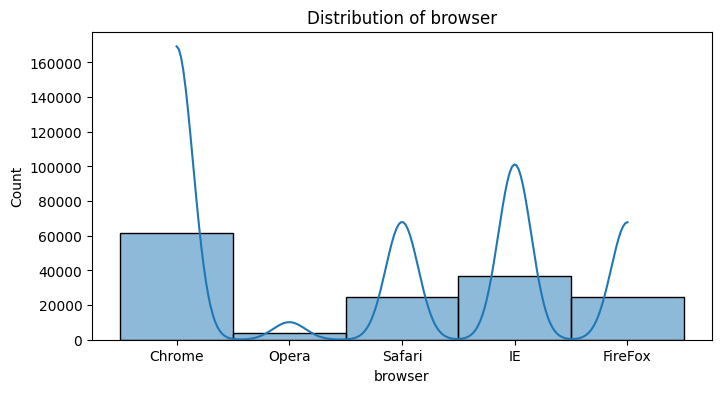

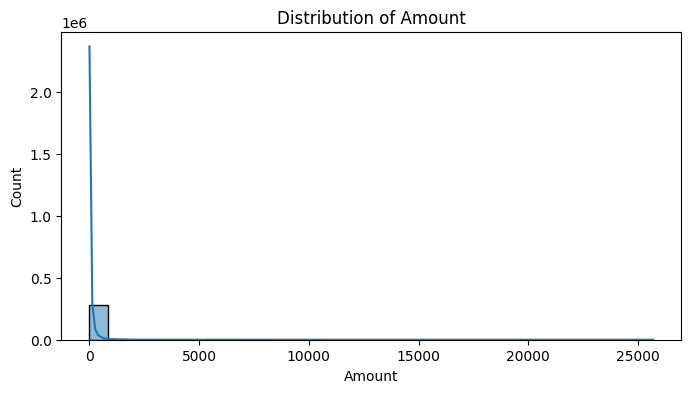

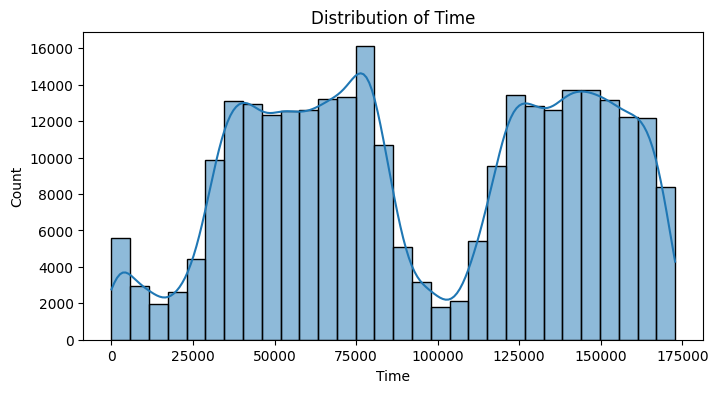

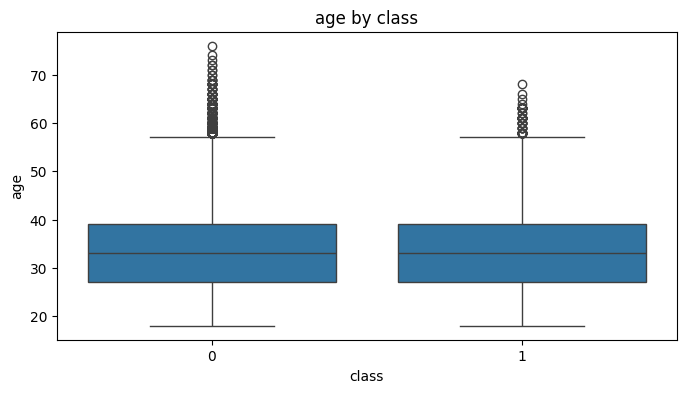

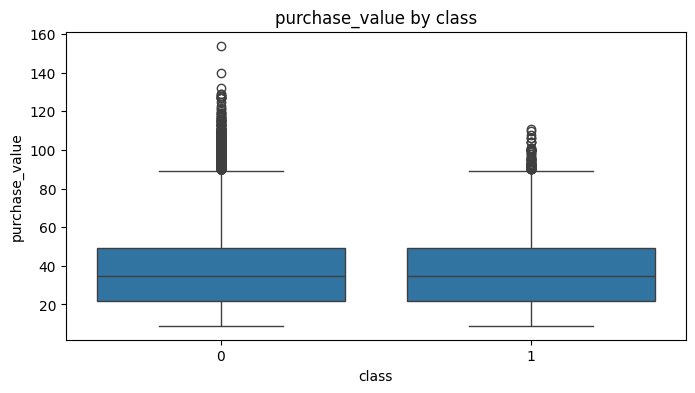

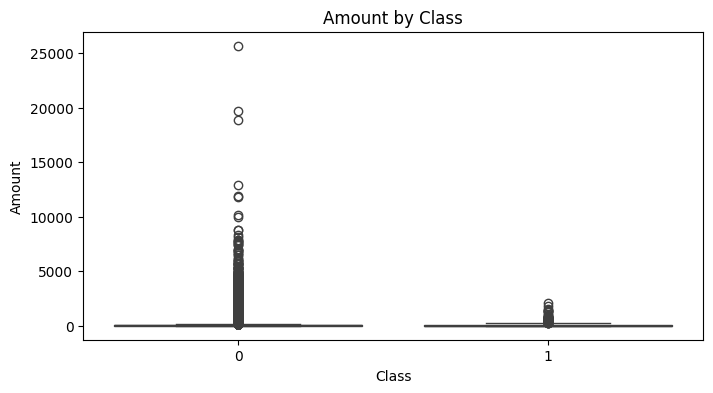

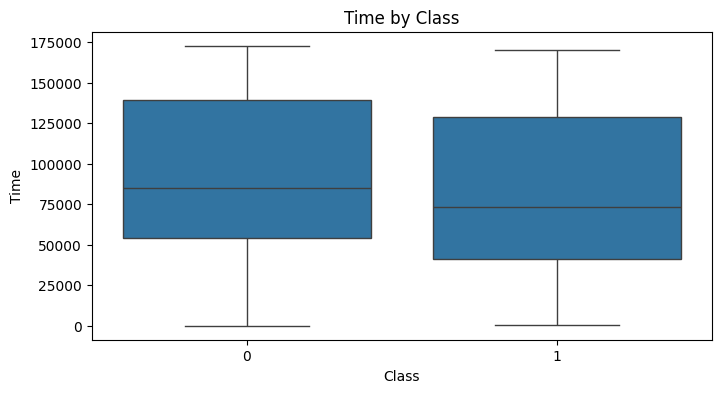

In [8]:

from src.EDA_and_Merge import (
    plot_univariate_distribution,
    plot_bivariate_boxplot,
    merge_ip_country,
    
)


# E-commerce fraud dataset
plot_univariate_distribution(fraud_df, 'age')
plot_univariate_distribution(fraud_df, 'purchase_value')
plot_univariate_distribution(fraud_df, 'sex')
plot_univariate_distribution(fraud_df, 'source')
plot_univariate_distribution(fraud_df, 'browser')

# Credit card dataset
plot_univariate_distribution(credit_df, 'Amount')
plot_univariate_distribution(credit_df, 'Time')

# ========================
#  Bivariate Analysis
# ========================

# Age vs Fraud
plot_bivariate_boxplot(fraud_df, 'class', 'age')

# Purchase Value vs Fraud
plot_bivariate_boxplot(fraud_df, 'class', 'purchase_value')

# Transaction Amount vs Fraud (credit card data)
plot_bivariate_boxplot(credit_df, 'Class', 'Amount')

# Time vs Fraud (credit card data)
plot_bivariate_boxplot(credit_df, 'Class', 'Time')



In [9]:
fraud_df = merge_ip_country(fraud_df, ip_df)

In [10]:
from src.fraud_features import engineer_fraud_features

fraud_df = engineer_fraud_features(fraud_df)

# View new features
fraud_df[['user_id', 'transaction_count', 'velocity', 'hour_of_day', 'day_of_week', 'time_since_signup']].head()

,user_id,transaction_count,velocity,hour_of_day,day_of_week,time_since_signup
0,22058,1,1000000.0,2,5,1251.856111
1,333320,1,1000000.0,1,0,4.984444
2,1359,1,1000000.0,18,3,0.000278
3,150084,1,1000000.0,13,0,136.690278
4,221365,1,1000000.0,18,2,1211.516944


In [11]:
fraud_df[['user_id', 'transaction_count', 'velocity', 'hour_of_day', 'day_of_week', 'time_since_signup']].head()

,user_id,transaction_count,velocity,hour_of_day,day_of_week,time_since_signup
0,22058,1,1000000.0,2,5,1251.856111
1,333320,1,1000000.0,1,0,4.984444
2,1359,1,1000000.0,18,3,0.000278
3,150084,1,1000000.0,13,0,136.690278
4,221365,1,1000000.0,18,2,1211.516944


In [12]:

from src.transform_preprocessing import transform_data


In [13]:

numeric_cols = ['purchase_value', 'age', 'time_since_signup', 'hour_of_day']
categorical_cols = ['source', 'browser', 'sex', 'country']



In [14]:

numeric_cols = ['purchase_value', 'age', 'time_since_signup', 'hour_of_day']
categorical_cols = ['source', 'browser', 'sex', 'country']


In [15]:

X_train, X_test, y_train, y_test, preprocessor = transform_data(
    df=fraud_df,
    target_col='class',
    numeric_cols=numeric_cols,
    categorical_cols=categorical_cols,
    imbalance_strategy='smote',    # or 'undersample'
    scaling='standard'             # or 'minmax'
)


Dropping columns: ['signup_time', 'purchase_time', 'device_id']


In [16]:
# Cell 5: Check the results
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("Class distribution after resampling:\n", pd.Series(y_train).value_counts())


X_train shape: (219136, 15)
X_test shape: (30223, 15)
Class distribution after resampling:
 class
0    109568
1    109568
Name: count, dtype: int64


In [17]:
import pandas as pd

def get_feature_names(preprocessor, numeric_cols, categorical_cols):
    """Extract feature names after ColumnTransformer"""
    cat_features = preprocessor.named_transformers_['cat'].get_feature_names_out(categorical_cols)
    all_features = list(numeric_cols) + list(cat_features)
    return all_features


In [19]:
# Get final feature names
feature_names = get_feature_names(preprocessor, numeric_cols, categorical_cols)

# Reconstruct X_train with column names
X_train_df = pd.DataFrame(X_train, columns=feature_names)
X_test_df = pd.DataFrame(X_test, columns=feature_names)

# Add the target variable back
X_train_df['class'] = y_train.reset_index(drop=True)
X_test_df['class'] = y_test.reset_index(drop=True)

# Save to CSV
X_train_df.to_csv("../data/processed/transformed_train.csv", index=False)
X_test_df.to_csv("../data/processed/transformed_test.csv", index=False)


In [3]:
import os
import sys
sys.path.append('..')
import pandas as pd
df = pd.read_csv("../data/raw/creditcard.csv")

from src.credit_card_transformation import transform_creditcard_data

numeric_cols = [col for col in df.columns if col not in ['Class']]
target_col = 'Class'

X_train_bal, X_test_scaled, y_train_bal, y_test, preprocessor = transform_creditcard_data(
    df,
    target_col=target_col,
    numeric_cols=numeric_cols,
    scaling='standard',
    imbalance_strategy='smote'
)


In [6]:
# Get column names from the preprocessor (after transformation)
feature_names = preprocessor.get_feature_names_out()

# Convert to DataFrame
X_train_df = pd.DataFrame(X_train_bal, columns=feature_names)
X_test_df = pd.DataFrame(X_test_scaled, columns=feature_names)

# Save to CSV
X_train_df.to_csv("../data/processed/X_train_balanced.csv", index=False)
X_test_df.to_csv("../data/processed/X_test_scaled.csv", index=False)
pd.DataFrame(y_train_bal, columns=['Class']).to_csv("../data/processed/y_train_balanced.csv", index=False)
pd.DataFrame(y_test, columns=['Class']).to_csv("../data/processed/y_test.csv", index=False)
